# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [203]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [204]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [205]:
### Número de saudávei, Número de doentes, Total
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)

### Quantidade média de doentes
tab['Qde_Media_doentes']=tab[1]/tab['All']


### ODDs
tab['ODDs']=tab[1]/tab[0]

### Odds ratio (Use o total como referência)
tab['ODDs ratio']=tab['ODDs']/tab.loc['All','ODDs']


### Logito (LOG(Odds))
tab['logito'] = np.log(tab['ODDs'])

### O LOG do Odds ratio (com o total como referência) é chamado de Weight of Evidence (WOE). Calcule-o.
tab['WOE'] = np.log(tab['ODDs ratio'])

tab

flag_doente,0,1,All,Qde_Media_doentes,ODDs,ODDs ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [210]:
range_age= pd.cut(df['age'],[0,38,48,58,68,78])
df['range_age']=range_age 
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,range_age
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(58, 68]"
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(58, 68]"
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(58, 68]"
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(0, 38]"
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(38, 48]"


In [211]:
tab_1 = pd.crosstab(df['range_age'], df['flag_doente'], margins= True)
tab_1

flag_doente,0,1,All
range_age,,,
"(0, 38]",8,3,11
"(38, 48]",50,21,71
"(48, 58]",63,53,116
"(58, 68]",35,57,92
"(68, 78]",8,5,13
All,164,139,303


In [212]:
### Quantidade média de doentes
tab_1['Qde_Media_doentes']=tab_1[1]/tab_1['All']


### ODDs
tab_1['ODDs']=tab_1[1]/tab_1[0]

### Odds ratio (Use o total como referência)
tab_1['ODDs ratio']=tab_1['ODDs']/tab_1.loc['All','ODDs']


### Logito (LOG(Odds))
tab_1['logito'] = np.log(tab_1['ODDs'])

### O LOG do Odds ratio (com o total como referência) é chamado de Weight of Evidence (WOE). Calcule-o.
tab_1['WOE'] = np.log(tab_1['ODDs ratio'])

tab_1

flag_doente,0,1,All,Qde_Media_doentes,ODDs,ODDs ratio,logito,WOE
range_age,,,,,,,,
"(0, 38]",8,3,11,0.272727,0.375000,0.442446,-0.980829,-0.815437
"(38, 48]",50,21,71,0.295775,0.420000,0.495540,-0.867501,-0.702108
"(48, 58]",63,53,116,0.456897,0.841270,0.992577,-0.172843,-0.007450
"(58, 68]",35,57,92,0.619565,1.628571,1.921480,0.487703,0.653096
"(68, 78]",8,5,13,0.384615,0.625000,0.737410,-0.470004,-0.304611
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [222]:
idade_media=round(df['age'].mean(),2)

print(f'Valor médio da variável age é {idade_media}')

Valor médio da variável age é 54.44


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

Text(0.5, 0, 'Range de Idades')

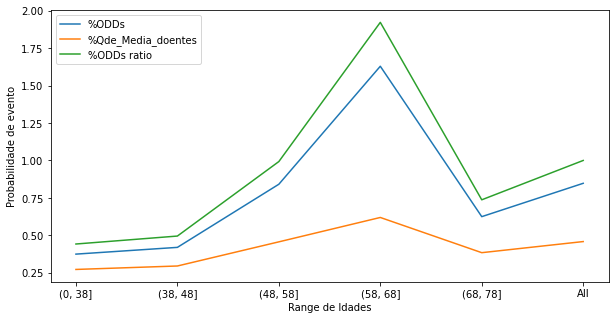

In [244]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)

ax = tab_1['ODDs'].plot(label='%ODDs')
ax = tab_1['Qde_Media_doentes'].plot(label='%Qde_Media_doentes')
ax = tab_1['ODDs ratio'].plot(label='%ODDs ratio')

#ticks = ax.set_xticks([0, 1, 2, 3, 4])
#labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="upper left")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Range de Idades')
